# Notebook de ayuda guía para futuras visualizaciones y procesamientos de datos biomédicos

In [2]:
# Instalación de librerías (solo si es necesario)
!pip install matplotlib pandas --quiet

In [3]:
# Importación de las librerías (siempre necesario)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### SECCIÓN 1. GRÁFICAS BIOMÉDICAS

#### Gráfica de barras: conteo celular

In [5]:
tipos = ["Linfocitos","Neutrofilos","Monocitos","Eosinofilos","Basofilos"]

In [6]:
conteo = [120,340,60,30,10]

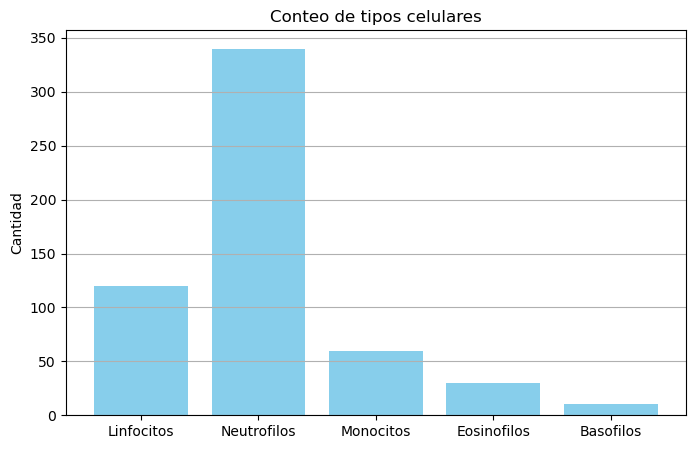

In [7]:
plt.figure(figsize=(8,5))
plt.bar(tipos,conteo,color="skyblue")
plt.title("Conteo de tipos celulares")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.show()

#### Línea: frecuencia cardíaca

In [8]:
tiempo = np.arange(0,10,0.5)
frecuencia = [72,75,78,85,95,110,125,135,145,150,140,130,115,100,90,80,75,72,70,68]

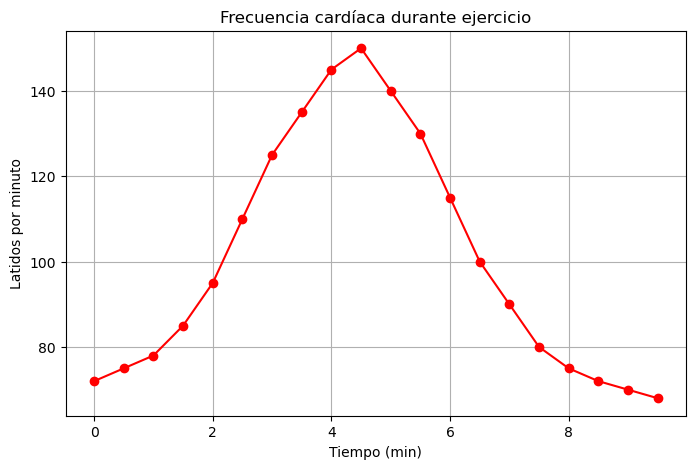

In [9]:
plt.figure(figsize=(8,5))
plt.plot(tiempo, frecuencia, marker='o',color="red")
plt.title("Frecuencia cardíaca durante ejercicio")
plt.xlabel("Tiempo (min)")
plt.ylabel("Latidos por minuto")
plt.grid(True)
plt.show()

#### Histograma: presión arterial

In [13]:
presiones = np.random.normal(120,15,100)

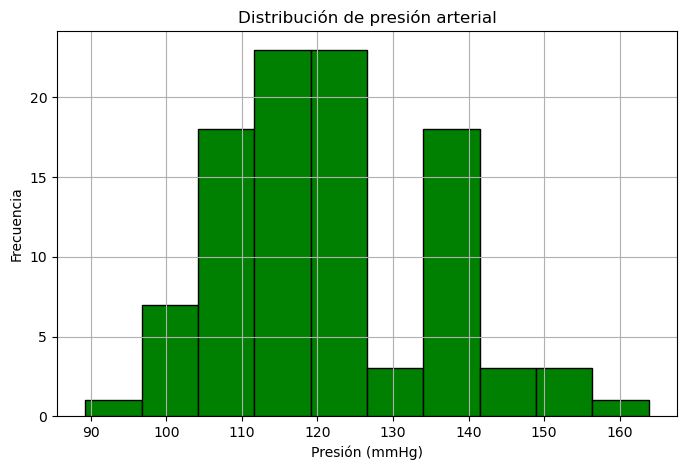

In [18]:
plt.figure(figsize=(8,5))
plt.hist(presiones,bins=10,color="green",edgecolor="black")
plt.title("Distribución de presión arterial")
plt.xlabel("Presión (mmHg)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

#### Dispersión: altura vs peso

In [14]:
alturas = np.random.normal(170,10,100)
pesos=0.45 * alturas + np.random.normal(0,5,100)

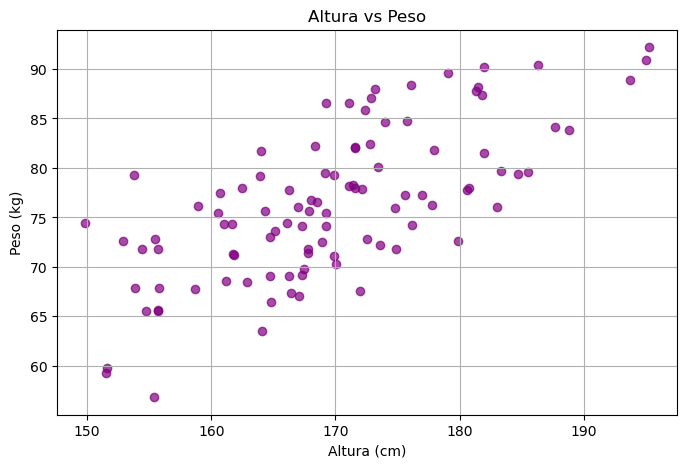

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(alturas,pesos,alpha=0.7,color="purple")
plt.title("Altura vs Peso")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.grid(True)
plt.show()

#### Boxplot: Glucosa

In [16]:
glucosa_sanos = np.random.normal(95,10,50)
glucosa_diabeticos = np.random.normal(160,20,50)

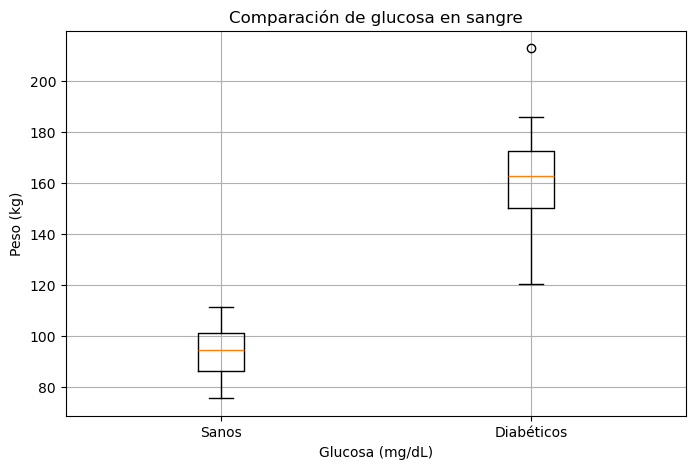

In [17]:
plt.figure(figsize=(8,5))
plt.boxplot([glucosa_sanos,glucosa_diabeticos],tick_labels=["Sanos","Diabéticos"])
plt.title("Comparación de glucosa en sangre")
plt.xlabel("Glucosa (mg/dL)")
plt.ylabel("Peso (kg)")
plt.grid(True)
plt.show()

### SECCIÓN 2. IMÁGENES SIMULADAS

#### Función para mostrar imágenes

In [20]:
def mostrar_imagen(img,titulo="Imagen",cmap="gray"):
    plt.figure(figsize=(5,5))
    plt.imshow(img,cmap=cmap)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

#### Imagen simulada de célula

In [23]:
img=np.zeros((256,256),dtype=np.uint8)
xx,yy = np.meshgrid(np.arange(256),np.arange(256))
centro = (128,128)

In [24]:
mascara_nucleo = (xx-centro[0])**2 + (yy -centro[1])**2 < 60**2
img[mascara_nucleo] = 200

In [25]:
mascara_membrana = ((xx-centro[0])**2 +(yy-centro[1])**2 < 90**2) & (~mascara_nucleo)
img[mascara_membrana] = 100

#### Tejido simulado

In [26]:
tejido = np.zeros((256,256),dtype=np.uint8)
for cx in range(40,256,80):
    for cy in range(40,256,80):
        dist=(xx-cx)**2 + (yy-cy)**2
        tejido[dist < 25**2] = 180
        tejido[dist < 12**2] = 255

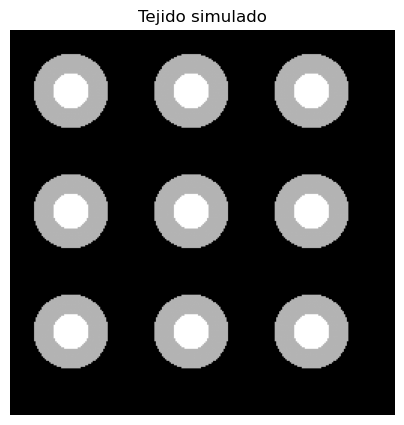

In [27]:
mostrar_imagen(tejido,"Tejido simulado")

#### Añadir ruido aleatorio

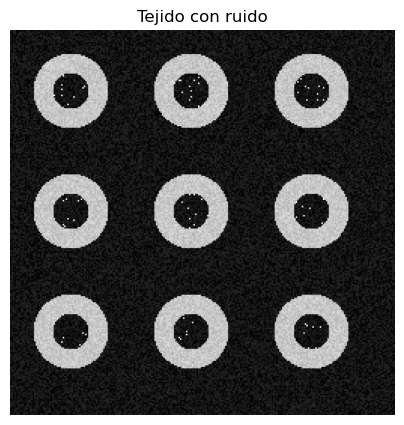

In [28]:
ruido=np.random.randint(0,40,size=(256,256),dtype=np.uint8)
tejido_ruido = np.clip(tejido + ruido,0,255)
mostrar_imagen(tejido_ruido,"Tejido con ruido")

#### Filtro promedio (suavizado)

In [29]:
def filtro_promedio(img):
    kernel = np.ones((3,3))/9
    img_pad = np.pad(img,1,mode='edge')
    out = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ventana = img_pad[i:i+3,j:j+3]
            out[i,j] = np.sum(ventana * kernel)
    return out.astype(np.uint8)

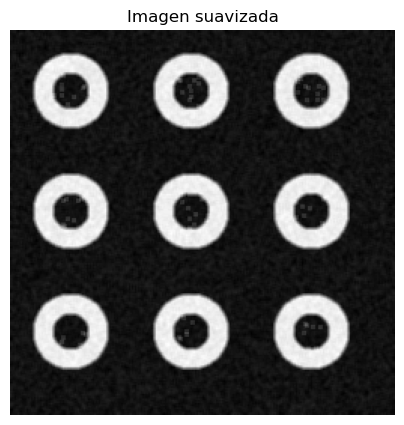

In [31]:
suavizada = filtro_promedio(tejido_ruido)
mostrar_imagen(suavizada,"Imagen suavizada")

#### Segmentación binaria por umbral

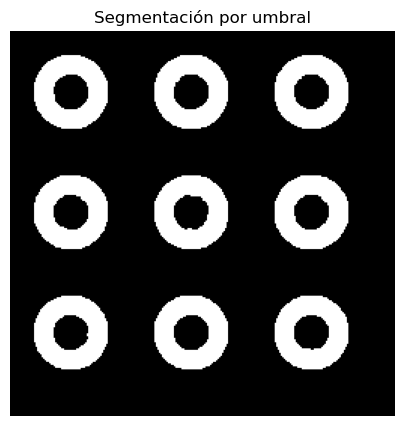

In [32]:
umbral = 100
segmentada =(suavizada > umbral).astype(np.uint8)*255
mostrar_imagen(segmentada,"Segmentación por umbral")

#### Guardar imagen

In [33]:
from matplotlib.image import imsave
imsave("segmentacion_resultado.png",segmentada,cmap="gray")
print("Imagen guardada como 'segmentacion_resulado.png'")

Imagen guardada como 'segmentacion_resulado.png'
